In [1]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

# Generate synthetic dataset
num_samples = 1000
num_features = 10
X = np.random.rand(num_samples, num_features)
y = np.random.randint(2, size=num_samples)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(num_features,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

#Generate the model graph
tf.keras.utils.plot_model(model, show_shapes=True)



ModuleNotFoundError: No module named 'tensorflow.python'

Epoch 1/3
1563/1563 [==============================] - 89s 56ms/step - loss: 1.4549 - accuracy: 0.4756 - val_loss: 1.1977 - val_accuracy: 0.5672
Epoch 2/3
1563/1563 [==============================] - 88s 56ms/step - loss: 1.0877 - accuracy: 0.6183 - val_loss: 1.0754 - val_accuracy: 0.6255
Epoch 3/3
1563/1563 [==============================] - 86s 55ms/step - loss: 0.9400 - accuracy: 0.6697 - val_loss: 0.9322 - val_accuracy: 0.6699


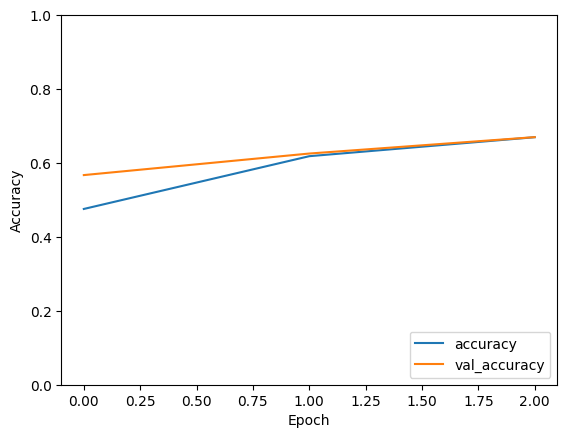

313/313 - 5s - loss: 0.9322 - accuracy: 0.6699 - 5s/epoch - 16ms/step

Test accuracy: 0.6699000000953674


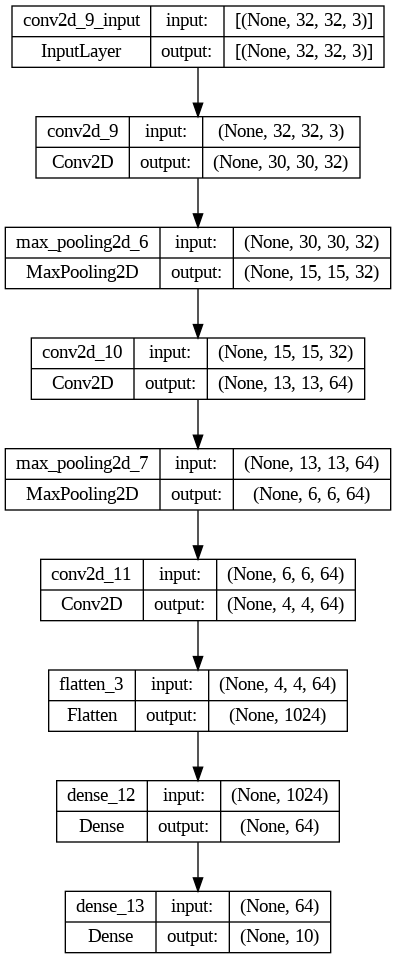

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

#Load the CIFAR-10 dataset and preprocess the data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 50.0, test_images / 50.0

#Define a CNN model using TensorFlow's Keras API
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

#Compile the model by specifying the loss function, optimizer, and evaluation metric
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Train the compiled model using the training data
history = model.fit(train_images, train_labels, epochs=3,
                    validation_data=(test_images, test_labels))

#Visualizing the training result
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

#Evaluating the Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

#Generate the model graph
tf.keras.utils.plot_model(model, show_shapes=True)
